# 텐서조작  
  
1. pytorch 설치

https://pytorch.org/get-started/locally/ 사이트 방문하여 본인 개발 환경에 맞게 구성하고 생성된 명령어 복사

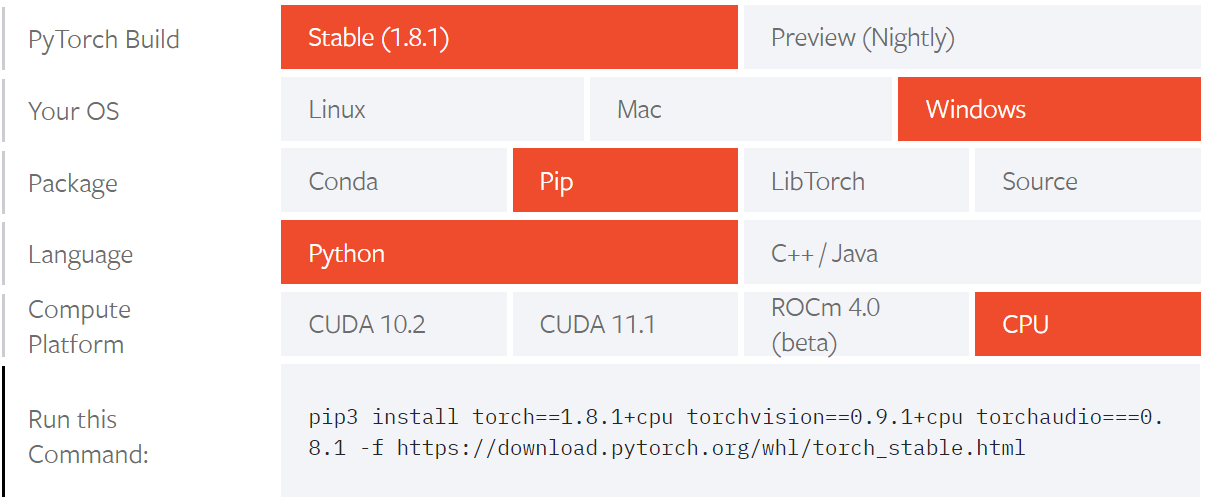


pip3 install torch torchvision torchaudio

2. 텐서  
1차원 값: 벡터  
2차원 값: 행렬  
3차원 값: 텐서(tensor)  

하지만 데이터를 정확히 위처럼 나누어서 표현하지 않고 1차원 데이터를 1차원 텐서,  2차원 데이터를 2차원 텐서,  3차원 데이터를 3차원 텐서로 표현하는 경우도 많으므로 행렬 형태의 데이터를 텐서라 이해하면 좋다  

3. 파이토치 텐서  
1) 1차원 텐서  

In [1]:
import torch

In [8]:
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [9]:
print(t.dim())  # 배열 차원
print(t.shape)  # shape
print(t.size()) #shape와 동일

1
torch.Size([7])
torch.Size([7])


In [10]:
print(t[0], t[1], t[-1])  # 인덱스로 접근
print(t[2:5], t[4:-1])    # 슬라이싱
print(t[:2], t[3:])       # 슬라이싱

tensor(0.) tensor(1.) tensor(6.)
tensor([2., 3., 4.]) tensor([4., 5.])
tensor([0., 1.]) tensor([3., 4., 5., 6.])


2) 2차원 텐서

In [11]:
t = torch.FloatTensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]
                      ])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [12]:
print(t.dim())  # rank. 즉, 차원
print(t.shape)
print(t.size()) # shape

2
torch.Size([4, 3])
torch.Size([4, 3])


In [13]:
print(t[:, 1]) # 첫번째 차원을 전체 선택한 상황에서 두번째 차원의 첫번째 것만 가져온다.
print(t[:, 1].size()) # ↑ 위의 경우의 크기

tensor([ 2.,  5.,  8., 11.])
torch.Size([4])


In [14]:
print(t[:, :-1]) # 첫번째 차원을 전체 선택한 상황에서 두번째 차원에서는 맨 마지막에서 첫번째를 제외하고 다 가져온다.

tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


3) 브로드캐스팅(Broadcasting)

In [15]:
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1 + m2)

tensor([[5., 5.]])


In [16]:
# Vector + scalar
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([3]) # [3] -> [3, 3]
print(m1 + m2)

tensor([[4., 5.]])


In [17]:
m1+5

tensor([[6., 7.]])

In [18]:
# 2 x 1 Vector + 1 x 2 Vector
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([[3], [4]])
print(m1 + m2)

tensor([[4., 5.],
        [5., 6.]])


4) 행렬 곱셈

In [19]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1.matmul(m2)) # [[1*1 + 2*2], [3*1 + 4*2]]

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])


In [20]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1 * m2) # [[1*1 , 2*1], [3*2 , 4*2]]
print(m1.mul(m2))

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


5) 평균

In [21]:
t = torch.FloatTensor([1, 2])
print(t.mean())

tensor(1.5000)


In [23]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t.mean())

tensor(2.5000)


dim은 차원 축소 속성으로 dim=0은 행을 제거, dim=1은 열을 제거함

In [24]:
print(t.mean(dim=0)) #dim=0: 열끼리 계산. 
'''
 [[1, 2],
  [3, 4]]
  [1과3의 평균, 2와4의 평균]
'''

tensor([2., 3.])


In [25]:
print(t.mean(dim=1)) #dim=1: 행끼리 계산
'''
 [[1, 2],
  [3, 4]]
  [1과2의 평균, 3와4의 평균]
'''

tensor([1.5000, 3.5000])


'\n [[1, 2],\n  [3, 4]]\n  [1과3의 평균, 2와4의 평균]\n'

In [26]:
print(t.mean(dim=-1)) #dim=1과 동일. 행끼리 계산

tensor([1.5000, 3.5000])


6) 덧셈

In [27]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t.sum()) # 단순히 원소 전체의 덧셈을 수행
print(t.sum(dim=0)) # 행을 제거
print(t.sum(dim=1)) # 열을 제거
print(t.sum(dim=-1)) # 열을 제거

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


7) 최대(Max, ArgMax)

In [28]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t.max()) # Returns one value: max

tensor(4.)


In [29]:
print(t.max(dim=0)) # Returns two values: max and argmax

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))


[1, 1]도 함께 리턴. max에 dim 인자를 주면 argmax도 함께 리턴.  
argmax는 최대값 요소의 위치(인덱스)

In [30]:
print('Max: ', t.max(dim=0)[0])
print('Argmax: ', t.max(dim=0)[1])

Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])


In [31]:
print(t.max(dim=1))
print(t.max(dim=-1))

torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


8) 뷰(view)  
텐서의 shape 변경

In [2]:
import numpy as np

t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)

In [5]:
print(ft.shape)

torch.Size([2, 2, 3])


In [6]:
#3차원 텐서에서 2차원 텐서로 변경

print(ft.view([-1, 3])) # ft라는 텐서를 (?, 3)의 크기로 변경
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [3]:
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


9) 스퀴즈(Squeeze) - 1인 차원을 제거

In [4]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [5]:
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


9) 언스퀴즈(Unsqueeze) - 특정 위치에 1인 차원을 추가

In [6]:
ft = torch.Tensor([0, 1, 2])
print(ft.shape)

torch.Size([3])


In [7]:
print(ft.unsqueeze(0)) # 인덱스가 0부터 시작하므로 0은 첫번째 차원을 의미한다. 
print(ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [8]:
#view로도 표현가능
print(ft.view(1, -1))
print(ft.view(1, -1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [9]:
print(ft.unsqueeze(1))#1번째 차원 추가
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [10]:
print(ft.unsqueeze(-1))
print(ft.unsqueeze(-1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


10) 타입 캐스팅  
  
데이터 타입  
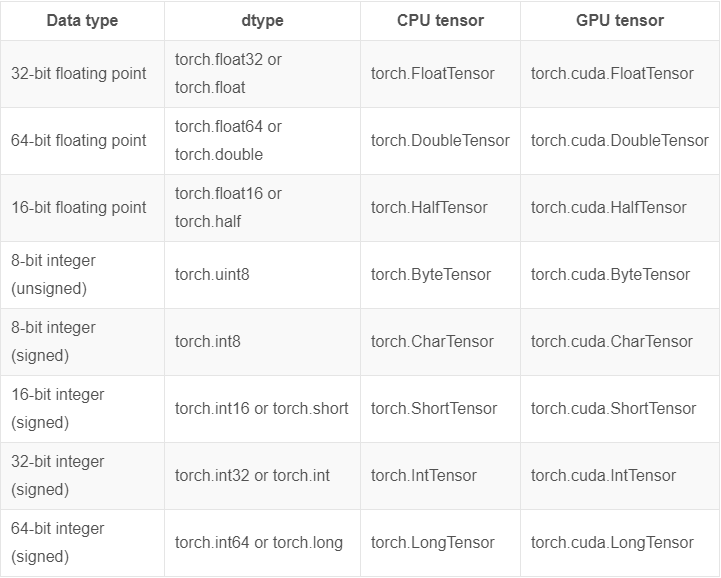

In [11]:
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)

tensor([1, 2, 3, 4])


In [12]:
print(lt.float())

tensor([1., 2., 3., 4.])


In [13]:
bt = torch.ByteTensor([True, False, False, True])
print(bt)

tensor([1, 0, 0, 1], dtype=torch.uint8)


In [14]:
print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


11) 연결하기(concatenate)

In [15]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

In [16]:
print(torch.cat([x, y], dim=0))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])


In [17]:
print(torch.cat([x, y], dim=1))

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


12) 스택킹(Stacking)

In [18]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

In [19]:
print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [20]:
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [21]:
print(torch.stack([x, y, z], dim=1))

tensor([[1., 2., 3.],
        [4., 5., 6.]])


13) ones_like와 zeros_like - 0으로 채워진 텐서와 1로 채워진 텐서

In [22]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [23]:
# 입력 텐서와 크기를 동일하게 하면서 값을 1로 채우기
print(torch.ones_like(x))

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [24]:
# 입력 텐서와 크기를 동일하게 하면서 값을 0으로 채우기
print(torch.zeros_like(x)) 

tensor([[0., 0., 0.],
        [0., 0., 0.]])


14) In-place Operation (덮어쓰기 연산)

In [25]:
x = torch.FloatTensor([[1, 2], [3, 4]])

In [26]:
print(x.mul(2.)) # 곱하기 2를 수행한 결과를 출력
print(x) # 기존의 값 출력

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])


In [27]:
#연산 뒤에 _를 붙이면 기존의 값을 덮어씀
print(x.mul_(2.))  # 곱하기 2를 수행한 결과를 변수 x에 값을 저장하면서 결과를 출력
print(x) # 기존의 값 출력

tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])
